In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [3]:
df_nba_draft = pd.read_csv("alldf.csv")

In [4]:
df_nba_draft.shape

(3260, 26)

In [5]:
df_nba_draft.columns

Index(['Unnamed: 0', 'School', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG%', '3PM',
       '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'PF', 'TOV', 'PTS', 'Link', 'DraftStatus', 'Season'],
      dtype='object')

In [6]:
df_nba_draft.head()

,Unnamed: 0,School,GP,GS,MIN,FGM,FGA,FG%,3PM,3PA,...,TRB,AST,STL,BLK,PF,TOV,PTS,Link,DraftStatus,Season
0,0,Washington,25.0,25.0,35.7,8.4,17.6,0.47600000000000003,2.1,5.0,...,5.7,5.9,1.6,1.2,2.5,3.2,23.2,https://www.sports-reference.com/cbb/players/m...,Drafted,2016-17
1,1,UCLA,36.0,36.0,35.1,5.3,9.5,0.551,2.2,5.4,...,6.0,7.6,1.8,0.8,1.8,2.5,14.6,https://www.sports-reference.com/cbb/players/l...,Drafted,2016-17
2,2,Duke,29.0,27.0,33.3,5.7,12.6,0.452,1.4,4.0,...,7.3,2.1,1.3,1.1,3.0,2.6,16.8,https://www.sports-reference.com/cbb/players/j...,Drafted,2016-17
3,3,Kansas,35.0,35.0,30.8,6.3,12.3,0.513,1.0,2.6,...,7.4,3.0,1.7,1.1,3.0,2.8,16.3,https://www.sports-reference.com/cbb/players/j...,Drafted,2016-17
4,4,Kentucky,36.0,34.0,29.6,5.9,12.4,0.479,0.5,1.9,...,4.0,4.6,1.5,0.2,2.5,2.4,16.7,https://www.sports-reference.com/cbb/players/d...,Drafted,2016-17


In [7]:
df_nba_draft['DraftStatus'].value_counts()

Undrafted    2517
Drafted       743
Name: DraftStatus, dtype: int64

In [8]:
drafts = df_nba_draft['DraftStatus'].value_counts()
drafts = drafts.sort_index()
drafts

Drafted       743
Undrafted    2517
Name: DraftStatus, dtype: int64

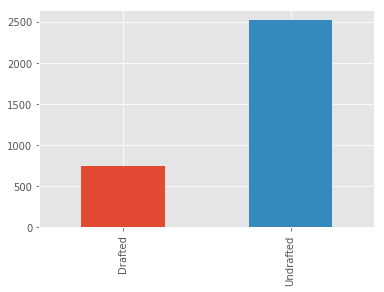

In [9]:
drafts.plot(kind='bar')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_nba_draft['FG%'], df_nba_draft['DraftStatus'], 
                                                    random_state=1, test_size=0.2, stratify=df_nba_draft['DraftStatus'])

In [11]:
print('X training size: ', X_train.shape)
print('y training size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X training size:  (2608,)
y training size:  (2608,)
X test size:  (652,)
y test size:  (652,)


In [12]:
vect = CountVectorizer(max_features=1000)
X_train_vect = vect.fit(X_train, y_train)
X_train_dtm = X_train_vect.transform(X_train)
print("Size of training dtm: ", X_train_dtm.shape)

Size of training dtm:  (2608, 452)


In [13]:
X_test_dtm = X_train_vect.transform(X_test)

print("Size of test dtm: ", X_test_dtm.shape)

Size of test dtm:  (652, 452)


In [14]:
parameters_mnb = {'alpha': (0.001, 0.01, 0.1, 1.0, 10.0, 100.0),
                 'fit_prior': (True, False)}

In [15]:
mnb = MultinomialNB()

In [16]:
gs_mnb = GridSearchCV(mnb, parameters_mnb, n_jobs=-1)


In [17]:
gs_mnb = gs_mnb.fit(X_train_dtm, y_train)

print("Grid Search for MultinomialNB")
print("Accuracy: ", gs_mnb.best_score_)
print("alpha: ", gs_mnb.best_params_['alpha'])
print("fit_prior: ", gs_mnb.best_params_['fit_prior'])

Grid Search for MultinomialNB
Accuracy:  0.790260736196319
alpha:  1.0
fit_prior:  True


In [19]:
print("Multinomial Naive Bayes: ")

gs_mnb_test_predictions = gs_mnb.predict(X_test_dtm)

print(metrics.confusion_matrix(y_test, gs_mnb_test_predictions))

gs_y_pred_test = gs_mnb.predict_proba(X_test_dtm)[:, 1]

print(metrics.classification_report(y_test, gs_mnb_test_predictions,target_names=["Drafted", "Undrafted"]))

Multinomial Naive Bayes: 
[[ 36 113]
 [ 30 473]]
             precision    recall  f1-score   support

    Drafted       0.55      0.24      0.33       149
  Undrafted       0.81      0.94      0.87       503

avg / total       0.75      0.78      0.75       652



In [20]:
print("Compare Target Class Label Counts to Classification Report")
print("0: Drafted, 1: Undrafted\n")
print(y_test.value_counts(ascending=True))

Compare Target Class Label Counts to Classification Report
0: Drafted, 1: Undrafted

Drafted      149
Undrafted    503
Name: DraftStatus, dtype: int64


In [22]:
predictions = gs_mnb.predict(X_test_dtm)
output = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
output

,Prediction,Actual
1972,Undrafted,Undrafted
1483,Undrafted,Undrafted
899,Undrafted,Undrafted
2300,Undrafted,Undrafted
980,Undrafted,Undrafted
96,Drafted,Drafted
2310,Undrafted,Undrafted
990,Undrafted,Undrafted
1717,Drafted,Undrafted
2963,Undrafted,Undrafted


In [27]:
output.to_csv("nboutput.csv", index=False, encoding='utf-8')
